In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!cat -n 10 datasets/babynames/yob1880.txt

     1	Mary,F,7065
     2	Anna,F,2604
     3	Emma,F,2003
     4	Elizabeth,F,1939
     5	Minnie,F,1746
     6	Margaret,F,1578
     7	Ida,F,1472
     8	Alice,F,1414
     9	Bertha,F,1320
    10	Sarah,F,1288
    11	Annie,F,1258
    12	Clara,F,1226
    13	Ella,F,1156
    14	Florence,F,1063
    15	Cora,F,1045
    16	Martha,F,1040
    17	Laura,F,1012
    18	Nellie,F,995
    19	Grace,F,982
    20	Carrie,F,949
    21	Maude,F,858
    22	Mabel,F,808
    23	Bessie,F,794
    24	Jennie,F,793
    25	Gertrude,F,787
    26	Julia,F,783
    27	Hattie,F,769
    28	Edith,F,768
    29	Mattie,F,704
    30	Rose,F,700
    31	Catherine,F,688
    32	Lillian,F,672
    33	Ada,F,652
    34	Lillie,F,647
    35	Helen,F,636
    36	Jessie,F,635
    37	Louise,F,635
    38	Ethel,F,633
    39	Lula,F,621
    40	Myrtle,F,615
    41	Eva,F,614
    42	Frances,F,605
    43	Lena,F,603
    44	Lucy,F,591
    45	Edna,F,588
    46	Maggie,F,582
    47	Pearl,F,569
    48	Daisy,F,564
    49	Fannie,F,560
    50	Josephine,F,544
    51	Do

cat: 10: No such file or directory


   838	Adrienne,F,5
   839	Albertine,F,5
   840	Alys,F,5
   841	Ana,F,5
   842	Araminta,F,5
   843	Arthur,F,5
   844	Birtha,F,5
   845	Bulah,F,5
   846	Caddie,F,5
   847	Celie,F,5
   848	Charlotta,F,5
   849	Clair,F,5
   850	Concepcion,F,5
   851	Cordella,F,5
   852	Corrine,F,5
   853	Delila,F,5
   854	Delphine,F,5
   855	Dosha,F,5
   856	Edgar,F,5
   857	Elaine,F,5
   858	Elisa,F,5
   859	Ellar,F,5
   860	Elmire,F,5
   861	Elvina,F,5
   862	Ena,F,5
   863	Estie,F,5
   864	Etter,F,5
   865	Fronnie,F,5
   866	Genie,F,5
   867	Georgina,F,5
   868	Glenn,F,5
   869	Gracia,F,5
   870	Guadalupe,F,5
   871	Gwendolyn,F,5
   872	Hassie,F,5
   873	Honora,F,5
   874	Icy,F,5
   875	Isa,F,5
   876	Isadora,F,5
   877	Jesse,F,5
   878	Jewel,F,5
   879	Joe,F,5
   880	Johannah,F,5
   881	Juana,F,5
   882	Judith,F,5
   883	Judy,F,5
   884	Junie,F,5
   885	Lavonia,F,5
   886	Lella,F,5
   887	Lemma,F,5
   888	Letty,F,5
   889	Linna,F,5
   890	Littie,F,5
   891	Lollie,F,5
   892	Lorene,F,5
   893	Louis,F,5

In [3]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",                         
names=["name", "sex", "births"])

In [4]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [5]:
names1880.groupby('sex')['births'].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [6]:
pieces = []
for year in range(1880, 2011):
    path =  f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [8]:
names_sex = names.copy()

In [9]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc='sum')
total_births.tail(5)

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


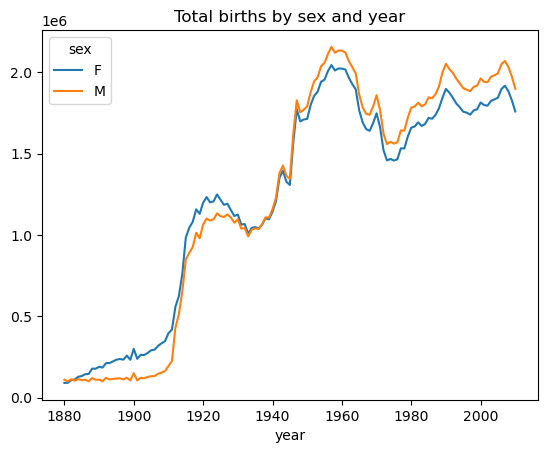

In [10]:
total_births.plot(title = 'Total births by sex and year')
plt.show()

In [11]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group

In [12]:
names = names.groupby(["year", "sex"]).apply(add_prop, include_groups=False)

In [14]:
names = names.reset_index(drop=True)

In [15]:
names['sex'] = pd.Series(names_sex['sex'])

In [16]:
names['year'] = pd.Series(names_sex['year'])

In [17]:
names

,name,births,prop,sex,year
0,Mary,7065,0.077643,F,1880
1,Anna,2604,0.028618,F,1880
2,Emma,2003,0.022013,F,1880
3,Elizabeth,1939,0.021309,F,1880
4,Minnie,1746,0.019188,F,1880
...,...,...,...,...,...
1690779,Zymaire,5,0.000003,M,2010
1690780,Zyonne,5,0.000003,M,2010
1690781,Zyquarius,5,0.000003,M,2010
1690782,Zyran,5,0.000003,M,2010


In [18]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [19]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]

In [20]:
grouped = names.groupby(["year", "sex"])

In [21]:
top1000 = grouped.apply(get_top1000, include_groups=False)

In [22]:
top1000.head()

name  births      prop
year sex                               
1880 F   0       Mary    7065  0.077643
         1       Anna    2604  0.028618
         2       Emma    2003  0.022013
         3  Elizabeth    1939  0.021309
         4     Minnie    1746  0.019188